In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test.csv')
df

,drug,target,pIC50
0,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,6.154902
1,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.602060
2,COc1cccc2[nH]c3ccccc3c(=O)c12,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.200659
3,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.860121
4,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,6.251812
...,...,...,...
1556,CCN(CC)CCCNc1cc(C)nc2c3cc4ccccc4nc3nn12,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,7.391474
1557,COc1ccc(-c2c3occc3c(OC[C@H]3OC3(C)C)c3ccc(=O)o...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,4.365825
1558,COc1ccc(C(=O)Nc2ccccc2-c2nnn(-c3cnccc3OC)n2)cc1,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,7.210419
1559,C=CC(O)C#CC#CC/C=C\CCCCCCC,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,4.379864


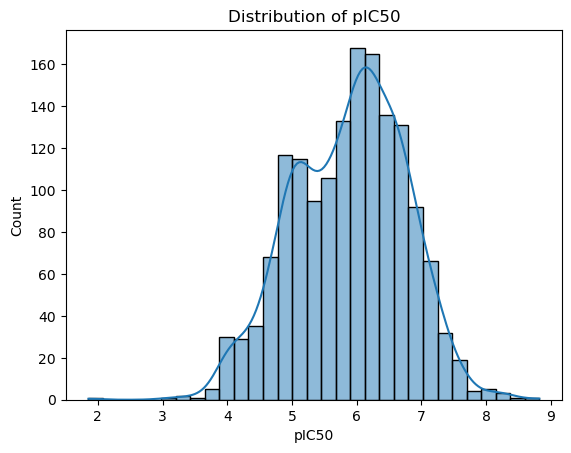

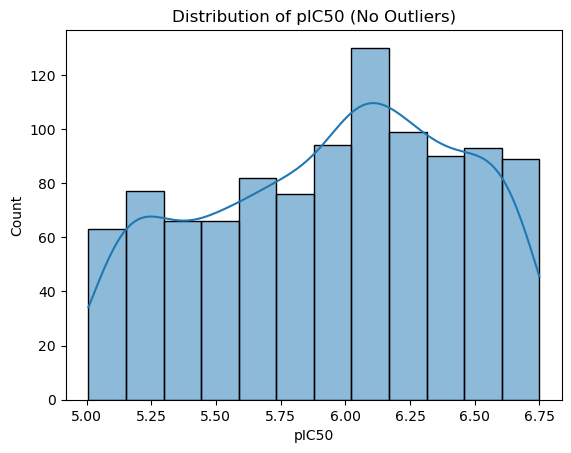

In [9]:
import seaborn as sns
# Plot the target variable datapoints
import matplotlib.pyplot as plt

# Plot the distribution of pIC50 column
sns.histplot(df['pIC50'], kde=True)
plt.title('Distribution of pIC50')
plt.xlabel('pIC50')
plt.ylabel('Count')
plt.show()

# Remove outliers using z-score
z_scores = (df['pIC50'] - df['pIC50'].mean()) / df['pIC50'].std()
df_no_outliers = df[(z_scores >= -1) & (z_scores <= 1)]

# Plot the distribution of pIC50 column after removing outliers
sns.histplot(df_no_outliers['pIC50'], kde=True)
plt.title('Distribution of pIC50 (No Outliers)')
plt.xlabel('pIC50')
plt.ylabel('Count')
plt.show()


In [11]:
df_no_outliers.to_csv('test_new.csv', index=False)
df_no_outliers

,drug,target,pIC50
0,COc1cc(O)c2c(=O)c3c(oc2c1)C(OC)Oc1c(O)cccc1-3,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,6.154902
1,COc1cc2oc3c(c(=O)c2c(O)c1C)-c1cccc(O)c1OC3OC,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.602060
2,COc1cccc2[nH]c3ccccc3c(=O)c12,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.200659
3,COc1ccc2c(=O)c3cccc(C(=O)NCCc4ccc(OC)c(OC)c4)c...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.860121
4,COc1ccc(CCNC(=O)c2cccc3c(=O)c4ccc(OC)cc4[nH]c2...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,6.251812
...,...,...,...
1549,CNC(=O)[C@]12C[C@@H]1[C@@H](n1cnc3c(NCc4cccc(-...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.396856
1550,COc1cc(CCNC2=NC(C#Cc3ccc(Cl)s3)=NC3=NC=NC32)ccc1O,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,5.302771
1551,CCOC(=O)[C@]12C[C@@H]1[C@@H](n1ccc3c(NCCc4cccc...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,6.356547
1552,CCOC(=O)[C@]12C[C@@H]1[C@@H](n1ccc3c(NCCCc4ccc...,MSSSNVEVFIPVSQGNTNGFPATASNDLKAFTEGAVLSFHNICYRV...,6.221849
